In [1]:
# %pip install gym==0.21.0
# %pip install gym-super-mario-bros==7.3.0
# %pip install stable-baselines3==1.7.0


In [2]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import gym
import cv2

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

done = True
for step in range(500):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())

    img = env.render( mode='rgb_array')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"training/{step}.png", img)

env.close()

/home/liyouzhou/anaconda3/envs/aml_task2/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [3]:
import sys
import gym
import pickle
import random
from typing import Callable
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.evaluation import evaluate_policy

import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, COMPLEX_MOVEMENT, RIGHT_ONLY
from stable_baselines3.common import atari_wrappers


In [4]:

environmentID = "SuperMarioBros2-v1"
trainMode = True # if sys.argv[1] == "train" else False
learningAlg = "DQN"
seed = random.randint(0, 1000) if trainMode else int(sys.argv[3])
policyFileName = learningAlg + "-" + environmentID + "-seed" + str(seed) + ".policy.pkl"
num_training_steps = 500000
num_test_episodes = 10
learning_rate = 0.00083
gamma = 0.995
policy_rendering = True

In [14]:
from training import load_model, make_env, MarioNet
from pathlib import Path
import cv2
import os
from stable_baselines3 import DQN, A2C, PPO

steps_per_episode = 0
reward_per_episode = 0
total_cummulative_reward = 0
episode = 1
model_dir = Path("logs/2024-04-12_23-31-46/PPO-SuperMarioBros2-v1-seed493.policy.pkl")
model = load_model(model_dir)

# model = DQN.load("logs/2024-04-11_00-54-47/best_model_440000")
env = model.get_env()
env = make_env("SuperMarioBros2-v1", seed=867, n_envs=1)
obs = env.reset()
policy_rendering = True
num_test_episodes = 10

log_folder = model_dir.parent

step_count = 0
while True and policy_rendering:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    steps_per_episode += 1
    reward_per_episode += reward

    img = env.render("rgb_array")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    step_count += 1
    image_dir = log_folder / "policy_rendering"
    os.makedirs(image_dir, exist_ok=True)
    cv2.imwrite(str(image_dir / f"{step_count}.png"), img)

    if any(done):
        print(
            "episode=%s, steps_per_episode=%s, reward_per_episode=%s"
            % (episode, steps_per_episode, reward_per_episode)
        )
        total_cummulative_reward += reward_per_episode
        steps_per_episode = 0
        reward_per_episode = 0
        episode += 1
        obs = env.reset()

    if episode > num_test_episodes:
        print(
            "total_cummulative_reward=%s avg_cummulative_reward=%s"
            % (total_cummulative_reward, total_cummulative_reward / num_test_episodes)
        )
        break

env.close()


Loading policy...
Building model PPO...
Using cuda device
Wrapping the env in a VecTransposeImage.
episode=1, steps_per_episode=1, reward_per_episode=[0.]


/home/liyouzhou/anaconda3/envs/aml_task2/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


episode=2, steps_per_episode=673, reward_per_episode=[663.]
episode=3, steps_per_episode=676, reward_per_episode=[667.]
episode=4, steps_per_episode=676, reward_per_episode=[667.]
episode=5, steps_per_episode=676, reward_per_episode=[667.]
episode=6, steps_per_episode=673, reward_per_episode=[663.]
episode=7, steps_per_episode=675, reward_per_episode=[665.]
episode=8, steps_per_episode=675, reward_per_episode=[665.]
episode=9, steps_per_episode=676, reward_per_episode=[666.]
episode=10, steps_per_episode=677, reward_per_episode=[667.]
total_cummulative_reward=[5990.] avg_cummulative_reward=[599.]


In [15]:

image_dir = Path("logs/2024-04-12_23-31-46") / "policy_rendering"
!ffmpeg -framerate 60 -i '{image_dir}/%d.png' -c:v libx264 -preset slow -tune stillimage -crf 24 -vf format=yuv420p -movflags +faststart -y {log_folder}/output.mp4

from IPython.display import Video

Video(f"{log_folder}/output.mp4")

ffmpeg version 4.4.2-0ubuntu0.22.04.1+esm3 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.4.0-1ubuntu1~22.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1+esm3 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enabl

logs/2024-04-12_22-55-30
logs/2024-04-12_23-31-46


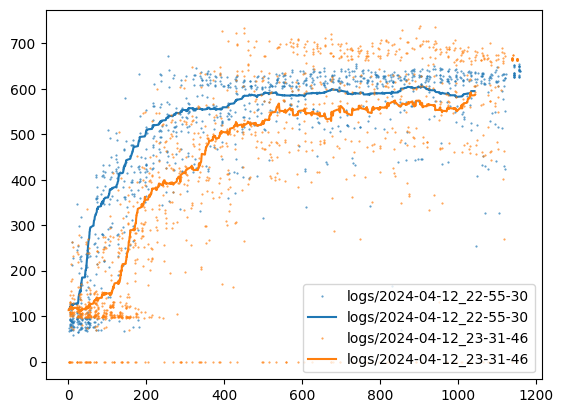

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from training import load_model
from pathlib import Path
import cv2, json
import numpy as np
from io import StringIO


for log_folder in ["logs/2024-04-12_22-55-30", "logs/2024-04-12_23-31-46"]: #"logs/2024-04-09_15-45-46"]: #"logs/2024-04-08_12-22-41", 
    log_folder = Path(log_folder)

    monitor_folder = log_folder / "monitor"
    monitor_files = list(monitor_folder.glob("*.csv"))

    merged_monitor_data = ""
    for monitor_file in monitor_files:
        with open(monitor_file, "r") as fd:
            cmt = fd.readline()
            hdr = fd.readline()
            if merged_monitor_data == "":
                merged_monitor_data += cmt
                merged_monitor_data += hdr
            merged_monitor_data += fd.read()

    df = pd.read_csv(StringIO(merged_monitor_data), skiprows=1)
    df = df.sort_values("t")
    # plt.plot(df.t, df.r / max(df.r),  ".", label="reward", markersize=1)
    p = plt.plot(df.t, df.r,  ".", label=log_folder, markersize=1, alpha=0.8)
    filtered = np.convolve(df.r, np.ones(100)/100, mode="valid")
    plt.plot(df.t[:len(filtered)], filtered,  "-", label=log_folder, markersize=1, color=p[0].get_color())

    print(log_folder)
    with open(log_folder / "params.json", "rb") as fd:
        params = json.load(fd)
        # print(json.dumps(params, indent=4))

# plt.plot(df.t, df.l / max(df.l),  label="length")
plt.legend()

state: (1, 84, 84, 1)


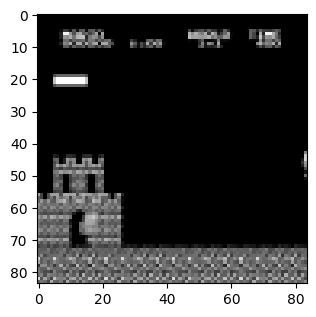

In [ ]:
import matplotlib.pyplot as plt
from training import make_env

def display_all_frame(state):
    plt.figure(figsize=(16,16))
    for idx in range(state.shape[3]):
        plt.subplot(1,4,idx+1)
        plt.imshow(state[0][:,:,idx], cmap='gray')
    plt.show()

env = make_env("SuperMarioBros2-v1", seed=867)
env.reset()
state, reward, done, info = env.step([1])
state, reward, done, info = env.step([1])
state, reward, done, info = env.step([1])
state, reward, done, info = env.step([1])
print('state:', state.shape) #Color scale, height, width, num of stacks
display_all_frame(state)